In [ ]:
import pandas as pd


meta_df = pd.read_csv("/content/channel_details.csv")
transcript_df = pd.read_csv("/content/all_transcripts.csv")

print("📊 Metadata Dataset")
print(meta_df.info())
print(meta_df.describe(include='all'))
print("\nMissing values per column:")
print(meta_df.isnull().sum())
print("\nDuplicates:", meta_df.duplicated().sum())

print("\n📊 Transcript Dataset")
print(transcript_df.info())
print(transcript_df.describe(include='all'))
print("\nMissing values per column:")
print(transcript_df.isnull().sum())
print("\nDuplicates:", transcript_df.duplicated().sum())

📊 Metadata Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       50 non-null     object
 1   title                    50 non-null     object
 2   description              50 non-null     object
 3   publishedAt              50 non-null     object
 4   tags                     49 non-null     object
 5   categoryId               50 non-null     int64 
 6   defaultLanguage          50 non-null     object
 7   defaultAudioLanguage     50 non-null     object
 8   thumbnail_default        50 non-null     object
 9   thumbnail_high           50 non-null     object
 10  duration                 50 non-null     object
 11  viewCount                50 non-null     int64 
 12  likeCount                50 non-null     int64 
 13  commentCount             50 non-null     int64 
 14  privacyStatus            

cleaning the dataset


In [ ]:
import pandas as pd

# Load data
meta_df = pd.read_csv("/content/channel_details.csv")
transcript_df = pd.read_csv("/content/all_transcripts.csv")

print("Before Cleaning:")
print("Metadata shape:", meta_df.shape)
print("Transcript shape:", transcript_df.shape)

# ✅ Force column order for metadata (same as extraction stage)
meta_columns = [
    "id", "title", "description", "publishedAt", "tags", "categoryId",
    "defaultLanguage", "defaultAudioLanguage",
    "thumbnail_default", "thumbnail_high", "duration",
    "viewCount", "likeCount", "commentCount", "privacyStatus",
    "channel_id", "channel_title", "channel_description",
    "channel_country", "channel_thumbnail",
    "channel_subscriberCount", "channel_videoCount"
]

# --- Clean Metadata ---
meta_df['publishedAt'] = pd.to_datetime(meta_df['publishedAt'], errors='coerce')
meta_df = meta_df.drop_duplicates(subset=["title"], keep="first")
meta_df['description'] = meta_df['description'].fillna("")

# ✅ Reorder + fill missing columns to keep schema intact
for col in meta_columns:
    if col not in meta_df.columns:
        meta_df[col] = ""  # add missing with empty values
meta_df = meta_df[meta_columns]

print("\nAfter Metadata Cleaning:")
print("Shape:", meta_df.shape)
print("Missing values per column:\n", meta_df.isnull().sum())


# --- Clean Transcript Dataset ---
if "transcript" in transcript_df.columns:
    transcript_df = transcript_df[["video_id", "transcript"]]
else:
    transcript_df = transcript_df.rename(columns={"id": "video_id"})[["video_id", "transcript"]]

transcript_df = transcript_df.dropna(subset=["transcript"])
transcript_df = transcript_df.drop_duplicates(subset=["video_id"], keep="first")

# ✅ Force column names for transcripts
transcript_df = transcript_df.rename(columns={"video_id": "id"})[["id", "transcript"]]

print("\nAfter Transcript Cleaning:")
print("Shape:", transcript_df.shape)
print("Missing values per column:\n", transcript_df.isnull().sum())

# --- Save cleaned CSVs ---
meta_df.to_csv("channel_details_cleaned.csv", index=False, encoding="utf-8")
transcript_df.to_csv("video_transcripts_cleaned.csv", index=False, encoding="utf-8")

print("\n💾 Cleaned datasets saved as:")
print("channel_details_cleaned.csv")
print("video_transcripts_cleaned.csv")


Before Cleaning:
Metadata shape: (50, 22)
Transcript shape: (50, 24)

After Metadata Cleaning:
Shape: (50, 22)
Missing values per column:
 id                         0
title                      0
description                0
publishedAt                0
tags                       1
categoryId                 0
defaultLanguage            0
defaultAudioLanguage       0
thumbnail_default          0
thumbnail_high             0
duration                   0
viewCount                  0
likeCount                  0
commentCount               0
privacyStatus              0
channel_id                 0
channel_title              0
channel_description        0
channel_country            0
channel_thumbnail          0
channel_subscriberCount    0
channel_videoCount         0
dtype: int64

After Transcript Cleaning:
Shape: (50, 2)
Missing values per column:
 id            0
transcript    0
dtype: int64

💾 Cleaned datasets saved as:
channel_details_cleaned.csv
video_transcripts_cleaned.csv


In [ ]:
!pip install youtube-transcript-api==0.6.2


Metadata shape: (50, 22)
Transcript shape: (50, 2)

Merged dataset shape: (50, 23)

 Metadata Summary:
           viewCount     likeCount  commentCount
count      50.000000     50.000000     50.000000
mean   183559.340000   5022.920000    189.240000
std    121915.737369   2371.488604    199.540038
min     34469.000000   1116.000000     29.000000
25%    107122.750000   3444.750000     98.250000
50%    150671.000000   4429.000000    142.500000
75%    224799.750000   5911.750000    228.000000
max    645032.000000  14624.000000   1436.000000

Transcript length stats:
count      50.000000
mean     3168.360000
std      1665.029935
min         0.000000
25%      1993.250000
50%      2994.000000
75%      4237.000000
max      6683.000000
Name: transcript_length, dtype: float64

 Top 5 videos by views:
                                                title  viewCount
19  L1. Introduction to Stack and Queue | Implemen...     645032
44  L1. Introduction to Sliding Window and 2 Point...     632406
42

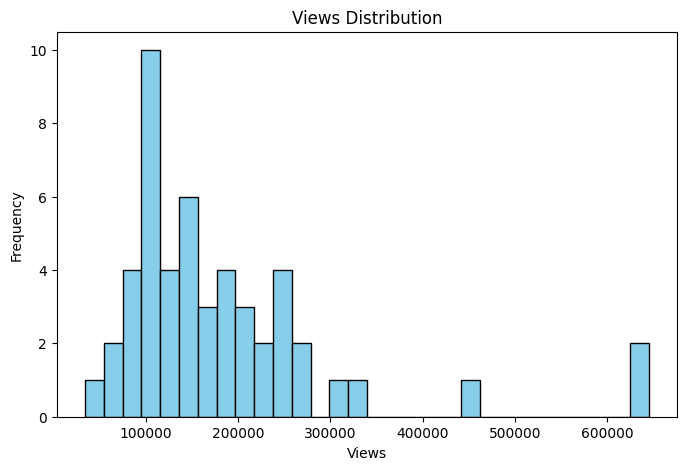

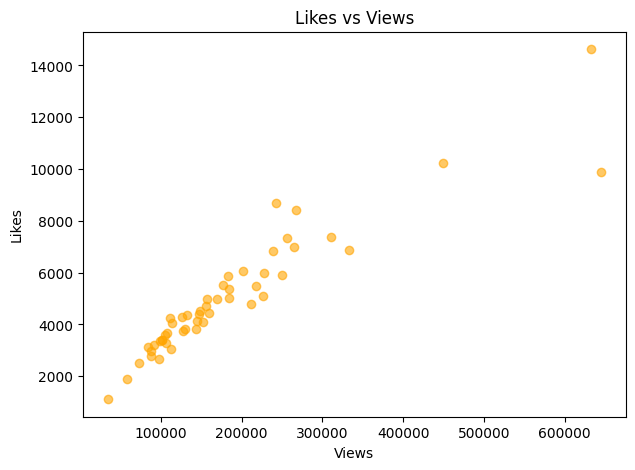

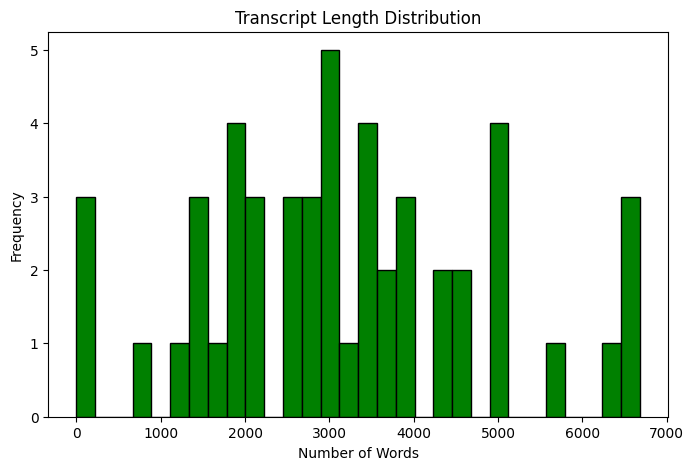

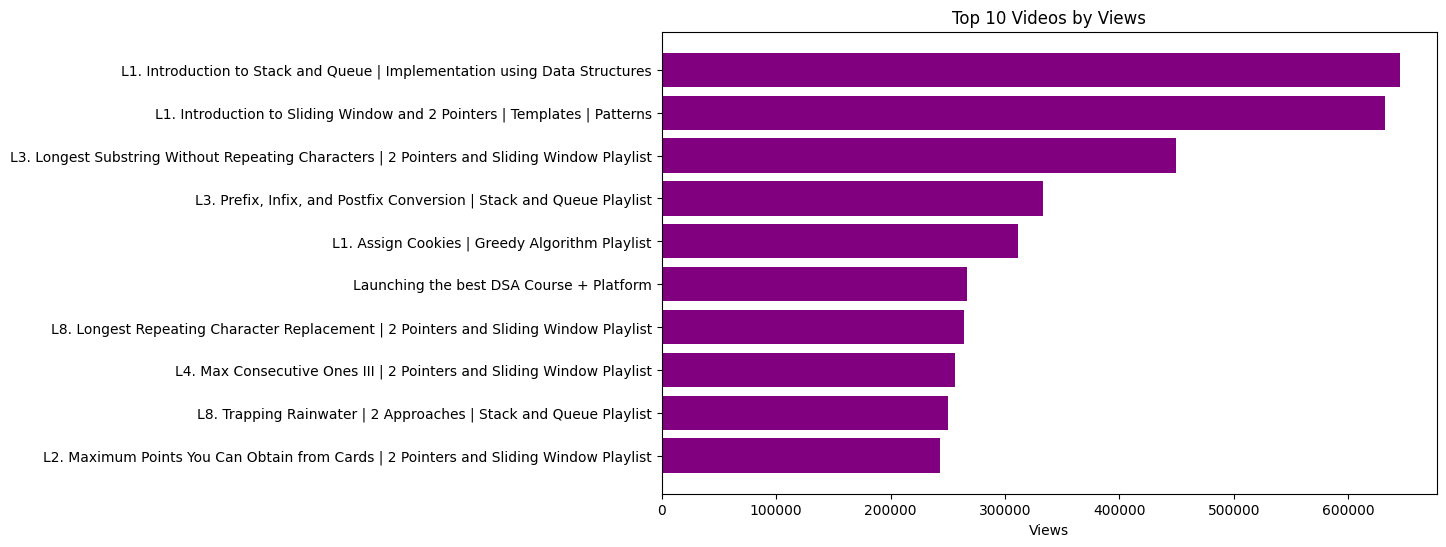

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

meta_df = pd.read_csv("/content/channel_details_cleaned.csv")
transcript_df = pd.read_csv("/content/video_transcripts_cleaned.csv")

print("Metadata shape:", meta_df.shape)
print("Transcript shape:", transcript_df.shape)

merged_df = pd.merge(meta_df, transcript_df, left_on="id", right_on="id", how="left")
print("\nMerged dataset shape:", merged_df.shape)

print("\n Metadata Summary:")
print(meta_df[["viewCount", "likeCount", "commentCount"]].describe())

merged_df["transcript_length"] = merged_df["transcript"].fillna("").apply(lambda x: len(str(x).split()))

print("\nTranscript length stats:")
print(merged_df["transcript_length"].describe())

print("\n Top 5 videos by views:")
print(meta_df[["title", "viewCount"]].sort_values(by="viewCount", ascending=False).head())

print("\n Top 5 videos by likes:")
print(meta_df[["title", "likeCount"]].sort_values(by="likeCount", ascending=False).head())

corr = meta_df[["viewCount", "likeCount", "commentCount"]].corr()
print("\nCorrelation Matrix:\n", corr)

# Visualizations

plt.figure(figsize=(8,5))
plt.hist(meta_df["viewCount"], bins=30, color="skyblue", edgecolor="black")
plt.title("Views Distribution")
plt.xlabel("Views")
plt.ylabel("Frequency")
plt.show()

# Likes vs Views scatter
plt.figure(figsize=(7,5))
plt.scatter(meta_df["viewCount"], meta_df["likeCount"], alpha=0.6, color="orange")
plt.title("Likes vs Views")
plt.xlabel("Views")
plt.ylabel("Likes")
plt.show()

# Transcript length distribution
plt.figure(figsize=(8,5))
plt.hist(merged_df["transcript_length"], bins=30, color="green", edgecolor="black")
plt.title("Transcript Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# Top 10 most viewed videos
top10 = meta_df.sort_values(by="viewCount", ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.barh(top10["title"], top10["viewCount"], color="purple")
plt.title("Top 10 Videos by Views")
plt.xlabel("Views")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
import pandas as pd

# Example: load both CSVs (or dataframes if you already have them)
channel_df = pd.read_csv("channel_details_cleaned.csv")       # has column: id
transcript_df = pd.read_csv("video_transcripts_cleaned.csv")  # has columns: id, transcript

# Merge on "id"
merged_df = pd.merge(channel_df, transcript_df, on="id", how="left")

# Now merged_df will have all ids from channel_details,
# and transcripts where available. NaN where transcript missing.
print(merged_df.head())

# Save back to CSV if needed
merged_df.to_csv("channel_with_transcripts.csv", index=False)


            id                                              title  \
0  M4IHWsk-EAM  Major Announcement | TUF+ V2 and System Design...   
1  4Xh9DLUQCWs           Launching the best DSA Course + Platform   
2  z9bJUPxzFOw                           L18. Implement LRU Cache   
3  cEadsbTeze4  L17. The Celebrity Problem | Stack and Queue P...   
4  NwBvene4Imo  L16. Sliding Window Maximum | Stack and Queue ...   

                                         description  \
0  Check out TUF+: https://takeuforward.org/plus?...   
1  Check out TUF+: https://takeuforward.org/plus?...   
2  Check out TUF+: https://takeuforward.org/plus?...   
3  Check out TUF+: https://takeuforward.org/plus?...   
4  Check out TUF+: https://takeuforward.org/plus?...   

                 publishedAt  \
0  2025-01-26 04:59:19+00:00   
1  2024-08-07 12:39:14+00:00   
2  2024-07-16 17:27:12+00:00   
3  2024-07-16 17:26:12+00:00   
4  2024-07-16 17:23:43+00:00   

                                                tags  c

In [ ]:
!pip install isodate

import pandas as pd
import re
import isodate

def clean_text(text):
    if pd.isna(text):
        return ""
    # 1. Remove emojis (Unicode ranges for emojis)
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)

    # 2. Remove special characters (#, @, |, [], {}, (), etc.)
    text = re.sub(r'[#@|\[\]{}()<>/\\^*+=~`":;!?]', ' ', text)

    # 3. Remove HTML tags (<br>, <i>, etc.)
    text = re.sub(r'<.*?>', ' ', text)

    # 4. Convert to lowercase
    text = text.lower()

    # 5. Strip extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text


def parse_duration_to_seconds(duration_str):
    """Parses an ISO 8601 duration string and returns the total seconds."""
    try:
        duration = isodate.parse_duration(duration_str)
        return int(duration.total_seconds())
    except Exception:
        return None


def clean_video_dataset(file_path, output_path):
    # Read dataset (works with .csv or .xlsx automatically)
    if file_path.endswith(".csv"):
        df = pd.read_csv(file_path)
    else:
        df = pd.read_excel(file_path)

    # Ensure required columns
    required_cols = {"id", "title", "description", "duration"}
    missing = required_cols - set(df.columns)
    if missing:
        raise ValueError(f"Dataset must contain {missing} columns")

    # Clean text for title & description
    df["clean_title"] = df["title"].apply(clean_text)
    df["clean_description"] = df["description"].apply(clean_text)

    # Convert duration into seconds
    df["duration_seconds"] = df["duration"].apply(parse_duration_to_seconds)

    # Drop duplicate rows based on id + clean_title
    df = df.drop_duplicates(subset=["id", "clean_title"])

    # Save cleaned dataset
    df.to_csv(output_path, index=False, encoding="utf-8")
    print(f"✅ Cleaned dataset with duration saved to {output_path}")


# Example usage:
clean_video_dataset("/content/master_task1_datset.csv", "/content/master_task1_cleaned.csv")


✅ Cleaned dataset with duration saved to /content/master_task1_cleaned.csv


In [ ]:
import pandas as pd
import re

def clean_transcript(text):
    if pd.isna(text):
        return ""
    text = str(text)
    # 1. Remove [Music], [Applause], etc.
    text = re.sub(r'\[.*?\]', ' ', text)
    # 2. Remove timestamps (hh:mm:ss or mm:ss)
    text = re.sub(r'\b\d{1,2}:\d{2}(?::\d{2})?\b', ' ', text)
    # 3. Remove special characters (keep letters, numbers, basic punctuation)
    text = re.sub(r'[^a-zA-Z0-9\s.,?!]', ' ', text)
    # 4. Lowercase
    text = text.lower()
    # 5. Replace newlines and tabs with spaces
    text = re.sub(r'[\n\t]+', ' ', text)
    # 6. Collapse multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text



def clean_transcript_dataset(file_path, output_path, video_meta_path=None):
    # Load transcript file robustly
    df = pd.read_csv(file_path, quoting=3, on_bad_lines="skip", engine="python")

    if not {"id", "transcript"}.issubset(df.columns):
        raise ValueError("Dataset must contain 'id' and 'transcript' columns")

    # Drop rows where id is missing or empty
    df = df[~df["id"].isna() & (df["id"].astype(str).str.strip() != "")]

    # Apply cleaning
    df["transcript"] = df["transcript"].apply(clean_transcript)

    # Remove empty transcripts after cleaning
    df = df[df["transcript"].str.strip() != ""]

    # Ensure id exists in metadata (if provided)
    if video_meta_path:
        meta = pd.read_csv(video_meta_path)
        if "id" not in meta.columns:
            raise ValueError("Metadata file must contain 'id' column")
        df = df[df["id"].isin(meta["id"].unique())]

    # Save final
    df.to_csv(output_path, index=False)
    print(f"✅ Final cleaned transcript dataset saved to {output_path}")


# Example usage:
clean_transcript_dataset(
    "/content/master_task2_datset.csv",
    "/content/master_task2_cleaned2.csv"
)



✅ Final cleaned transcript dataset saved to /content/master_task2_cleaned2.csv


In [ ]:
import pandas as pd

# Load the CSVs
task1 = pd.read_csv("master_task1_cleaned_final.csv")
task2 = pd.read_csv("master_task2_cleaned_final.csv")

# Add flag column (True if ID exists in task2, else False)
task1["flag"] = task1["id"].isin(task2["id"])

# Save updated file
task1.to_csv("master_task1_flag.csv", index=False)

print("✅ Flag column added successfully!")
print(task1[["id", "flag"]].head())  # Show first few rows with flags


✅ Flag column added successfully!
            id  flag
0  r4loBN9ffls  True
1  NVpxN1vAbNM  True
2  yg_K45YtzSs  True
3  xoptBxQvIT0  True
4  w9k1oXwiOJY  True


### *Embeddings*

In [ ]:
import pandas as pd

# Load both CSV files
df1 = pd.read_csv("/content/master_task1_flag.csv")
df2 = pd.read_csv("/content/master_task2_cleaned_final.csv")

# Merge the dataframes based on 'video_id'
merged_df = pd.merge(df1, df2, on='id', how='inner')  # use 'left', 'right', or 'outer' if needed

# Save the merged file
merged_df.to_csv("merged_output.csv", index=False)

print("✅ Merge successful! Saved as merged_output.csv")
print("Number of rows in merged file:", len(merged_df))

✅ Merge successful! Saved as merged_output.csv
Number of rows in merged file: 365


In [ ]:
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np

# Load the merged CSV
data = pd.read_csv("/content/merged_output.csv")   # change file name if yours is different

# Combine title and transcript for embedding
data["text_for_embedding"] = data["title"].fillna('') + " " + data["transcript"].fillna('')

# Load the model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Generate embeddings
embeddings = model.encode(data["text_for_embedding"].tolist(), show_progress_bar=True)

# Add embeddings as a column (store as list)
data["embedding"] = embeddings.tolist()

# Save the dataset with embeddings
data.to_csv("dataset_with_embeddings.csv", index=False)
data.to_parquet("dataset_with_embeddings.parquet", index=False)

print("✅ Embeddings generated and saved successfully!")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/12 [00:00<?, ?it/s]

✅ Embeddings generated and saved successfully!


In [ ]:
!pip install chromadb

In [ ]:

import pandas as pd
import chromadb
from chromadb.utils import embedding_functions
import ast

# ============================================
# 1️⃣ Load dataset with embeddings
# ============================================
data = pd.read_csv("/content/dataset_with_embeddings.csv")

# Convert stringified embeddings to lists (if needed)
if isinstance(data["embedding"].iloc[0], str):
    data["embedding"] = data["embedding"].apply(ast.literal_eval)

# ============================================
# 2️⃣ Remove duplicate IDs
# ============================================
print("Before removing duplicates:", len(data))
data = data.drop_duplicates(subset=["id"], keep="first")
print("After removing duplicates:", len(data))

# ============================================
# 3️⃣ Initialize ChromaDB
# ============================================
client = chromadb.PersistentClient(path="chroma_db")

collection = client.get_or_create_collection(
    name="video_embeddings",
    embedding_function=embedding_functions.SentenceTransformerEmbeddingFunction(
        model_name="sentence-transformers/all-MiniLM-L6-v2"
    )
)

# ============================================
# 4️⃣ Add to ChromaDB
# ============================================
collection.add(
    ids=[str(i) for i in data["id"]],
    embeddings=data["embedding"].tolist(),
    metadatas=[
        {
            "id": row["id"],
            "title": row["title"],
            "transcript": row["transcript"]
        }
        for _, row in data.iterrows()
    ],
    documents=data["text_for_embedding"].tolist()
)

print("✅ Successfully stored data in ChromaDB after removing duplicate IDs!")

# ============================================
# 5️⃣ Optional — Semantic Search Test
# ============================================
query = "Explain about AI and machine learning"
results = collection.query(query_texts=[query], n_results=3)

print("\n🔍 Top Search Results:")
for doc, meta in zip(results["documents"][0], results["metadatas"][0]):
    print(f"\n🎥 {meta['title']}\n📜 {doc[:200]}...")


Before removing duplicates: 365
After removing duplicates: 364
✅ Successfully stored data in ChromaDB after removing duplicate IDs!

🔍 Top Search Results:

🎥 ai engineering a realistic roadmap for beginners
📜 ai engineering a realistic roadmap for beginners if you're interested in becoming an ai engineer, then watch this video. i'm going to give you a complete road map, a step by step guide on how to break...

🎥 most people do not know what an ai engineer actually is.
📜 most people do not know what an ai engineer actually is. what an ai engineer is, which really means that you're responsible for implementing ai into software systems. it doesn't mean that you're going...

🎥 how to become an 300k ai engineer in 2025 complete roadmap
📜 how to become an 300k ai engineer in 2025 complete roadmap since november 2022 not a single day where we haven't heard about ai but did you know that ai has existed since 1950s you and i both know tha...


In [ ]:
from sentence_transformers import SentenceTransformer
import chromadb
import numpy as np

# ==============================
# Initialize Persistent ChromaDB Client
# ==============================
client = chromadb.PersistentClient(path="chroma_db")
collection_name = "video_embeddings"
collection = client.get_collection(collection_name)

# ==============================
# 1️⃣ Query Input Handling
# ==============================
def get_user_query():
    query = input("Enter your search query (or 'exit' to quit): ").strip()
    if query.lower() == "exit":
        return None
    if not query:
        print("⚠️ Query cannot be empty. Try again.")
        return get_user_query()
    return query

# ==============================
# 2️⃣ Generate Query Embedding
# ==============================
model = SentenceTransformer('all-MiniLM-L6-v2')

def generate_query_embedding(query):
    embedding = model.encode([query])
    return np.array(embedding)

# ==============================
# 3️⃣ Perform Semantic Search
# ==============================
def search_chromadb(embedding, top_k=5):
    results = collection.query(
        query_embeddings=embedding.tolist(),
        n_results=top_k,
        include=['metadatas', 'distances', 'documents']
    )
    return results

# ==============================
# 4️⃣ Format & Display Results
# ==============================
def display_results(results):
    if len(results['documents'][0]) == 0:
        print("⚠️ No results found.")
        return

    for i, (doc, meta, distance) in enumerate(zip(
        results['documents'][0],
        results['metadatas'][0],
        results['distances'][0]
    )):
        similarity = round(1 - distance, 3)
        print(f"🔹 Result {i+1}")
        print(f"Video ID: {meta.get('id','N/A')}")
        print(f"Title: {meta.get('title','N/A')}")
        print(f"Similarity Score: {similarity}")
        print(f"Transcript snippet: {doc[:150]}...")
        print("-"*50)

# ==============================
# 5️⃣ Main Loop
# ==============================
while True:
    query = get_user_query()
    if query is None:
        print("👋 Exiting semantic search.")
        break

    embedding = generate_query_embedding(query)
    results = search_chromadb(embedding, top_k=5)
    display_results(results)


Enter your search query (or 'exit' to quit): sliding window
🔹 Result 1
Video ID: 9kdHxplyl5I
Title: l1. introduction to sliding window and 2 pointers templates patterns
Similarity Score: 0.499
Transcript snippet: l1. introduction to sliding window and 2 pointers templates patterns so with this video we will be starting off with the 2 pointer and the sliding win...
--------------------------------------------------
🔹 Result 2
Video ID: NwBvene4Imo
Title: l16. sliding window maximum stack and queue playlist
Similarity Score: 0.494
Transcript snippet: l16. sliding window maximum stack and queue playlist so let's continue with our stack and q playlist for starting off he welcome back to the channel i...
--------------------------------------------------
🔹 Result 3
Video ID: 3E4JBHSLpYk
Title: l4. max consecutive ones iii 2 pointers and sliding window playlist
Similarity Score: 0.297
Transcript snippet: l4. max consecutive ones iii 2 pointers and sliding window playlist so let's continue wi